### Jensen's inequality

For option with $S = 100$ wich could be 50 or 150 in a year :<br/>
$Payoff \; (Expected[Stock \; price]) = 0$ <br/>
$Expected \; (Payoff[Stock \; price]) = 25$ <br/>
<br/>
This follows from Jensen's inequality because payoff is convex function: <br/>
$$f(E[S]) \leq E[f(S)]$$

If we expand $f$ to Taylor series in $S$ neighbourghood, then <br/>
\begin{multline}
E[f(S)] = \\
E[f(\overline{S} + \epsilon)] = \\
E[ f(\overline{S}) + \epsilon f'(\overline{S}) + \frac{1}{2} \epsilon^2 f''(\overline{S}) + \dots] \approx \\
f(\overline{S}) + \frac{1}{2} f''(\overline{S}) E[\epsilon^2] = \\
f(E[S]) + \frac{1}{2}f''(E[S])E[\epsilon^2]
\end{multline}

<br/>
Hence $E[f(S)]$ is greater than $f(E[S])$ on approximately $\frac{1}{2}f''(E[S])E[\epsilon^2]$. <br/>
$f''(E[S])$ - is option <b>convexity</b>. <br/>
$E[\epsilon^2]$ - is <b>variance of underlying randomness</b>. <br/>

### Examining returns

In [33]:
import yfinance as yf
import matplotlib.pyplot as plt
SPY = yf.download("SPY", start='2019-01-01', end='2020-01-01')
SPY['ret'] = (SPY['Adj Close'] - SPY['Adj Close'].shift(1)) / SPY['Adj Close'].shift(1)
# SPY.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


mean = 0.001109895322145985
std = 0.007881111979326502


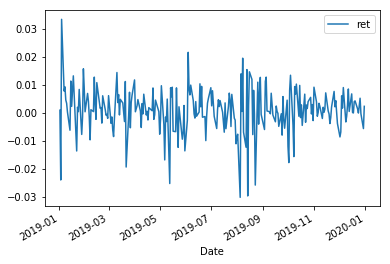

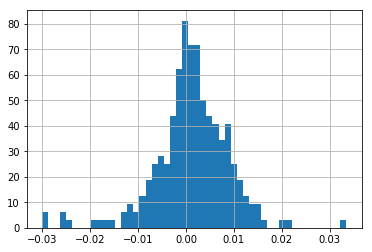

In [65]:
print("mean = %s" % SPY['ret'].mean())
print("std = %s" %  SPY['ret'].std())
SPY.reset_index().plot(x='Date', y='ret')
plt.show()
SPY['ret'].hist(bins=50, normed = True)
plt.show()

### Timescales and estimating volatility

If we assume that $\frac{S_{i+1} - S_i}{S_i} = \mu \delta t$, then $S_M = S_0 (1 + \mu\delta t)^M \approx S_0 e^{\mu M\delta t}$ . <br/>
If we add standard deviation to the model, then we get $R_i = \frac{S_{i+1} - S_i}{S_i} = \mu\delta t + \sigma\phi\delta t^{0.5}$, which implies that $S_{i+1} - S_i = \mu S_i \delta t + \sigma S_i \phi\delta t^{0.5}$ <br/>

In this model <b>drift</b> $\mu$ can be estimated as $\frac{1}{M\delta t} \sum_{i=1}^M R_i$ <br/>
<b>Volatility</b> $\sigma$ cam be estimated as $\sqrt{\frac{1}{(M-1)\delta t} \sum_{i=1}^M (R_i - \overline{R})^2}$ <br/>

When $\delta t$ is small $\overline{R}$ term can be ignored and volatility is equal to
$$
\sqrt{\frac{1}{(M-1)\delta t} \sum_{i=1}^M (\log S(t_i) - \log S(t_{i-1}))^2}
$$


### Random Walk (again)

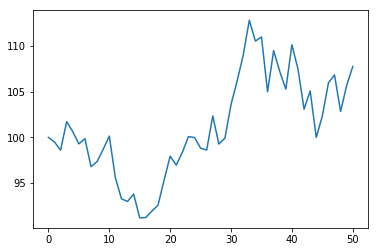

In [73]:
import random
asset = 100
drift = 0.15
volatility = 0.25
timestep = 0.01

S = [asset]
for i in range(0, 50):
    phi = random.gauss(0, 1)
    S.append(S[-1] * (1 + drift * timestep + volatility * phi * (timestep ** 0.5))) 
    
plt.plot(S)
plt.show()

### Weiner process

Let's write $\phi \; \delta t^{\frac{1}{2}}$ as $dX$. We will think about $dX$ as variable drawn from Normal distribution with zero mean and $dt$ variance: <br/>
$E[dX] = 0$ and $E[dX^2] = dt$ <br/>

Our asset price model in Weiner process notation can be written as stochastic differential equation:
$$ dS = \mu Sdt + \sigma Sdx $$

### Central Limit Theorem
Let $X_1, X_2, \dots$ be a sequence of i.i.d. with finite means $m$ and non-zero variances $s^2$. Then sum
$$ S_n = X_1 + X_2 + \dots X_n $$
is Normally distributed with mean $nm$ and variance $ns^2$, when $n \rightarrow \infty$

--------------
#### Exercise 1

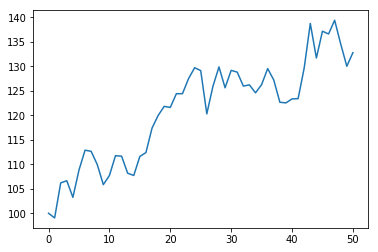

In [87]:
r = 0.12
v = 0.2
asset = 100
timestep = 1 / 52


S = [asset]
for i in range(0, 50):
    phi = random.gauss(0, 1)
    S.append(S[-1] * (1 + drift * timestep + volatility * phi * (timestep ** 0.5))) 
    
plt.plot(S)
plt.show()

--------------
#### Exercise 2

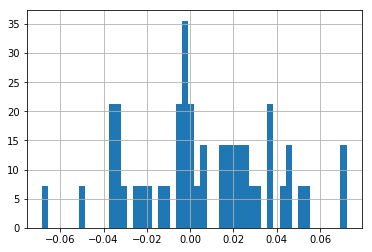

In [88]:
import pandas as pd
sdf = pd.DataFrame({'price': S})
sdf['ret'] = (sdf['price'] - sdf['price'].shift(1)) / sdf['price'].shift(1)
sdf['ret'].hist(bins=50, normed = True)
plt.show()

--------------
#### Exercise 3

mean = 0.006154557190425311
std = 0.030922239983556293


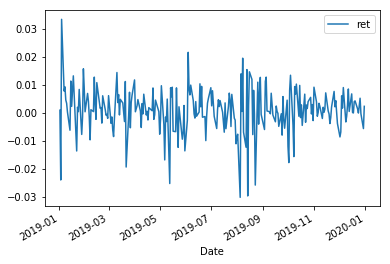

In [89]:
print("mean = %s" % sdf['ret'].mean())
print("std = %s" %  sdf['ret'].std())
SPY.reset_index().plot(x='Date', y='ret')
plt.show()

--------------
#### Exercise 4